In [1]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
#Stochastic Gradient Descent; sources used for code/fns are below

#https://realpython.com/gradient-descent-algorithm-python/
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html




#read the file
df = pd.read_csv("card_transdata.csv").dropna()
x = df.drop(df.columns[[7]], axis=1) #all the parameters
y = df.iloc[:, 7] #target values
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, train_size = .75)

#normalizing the data to fit the model better
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test) #make sure this actually applies the same normalization here as it did to the training data


#feature selector
#selector = SelectKBest(score_func=chi2,k=3).fit_transform(x_train,y_train)
#print(selector.shape)


#fitting and creating the model using sklearn
clf = SGDClassifier(loss = "hinge", max_iter=100)
#gives linear regression, a probabilistic classifier.
clf.fit(x_train_norm, y_train)

#coefficients and bias
#clf.coef_ => coefficients to determine the weights of each fo
#clf.intercept_ => the intercept/ bias term

#predicted values
y_pred = clf.predict(x_test_norm)

#calculate f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 score:',f1_score(y_test, y_pred)) #0.7549407114624507

Accuracy: 0.961468
Precision: 0.8814660610648498
Recall: 0.6431168592074378
F1 score: 0.743660022885122


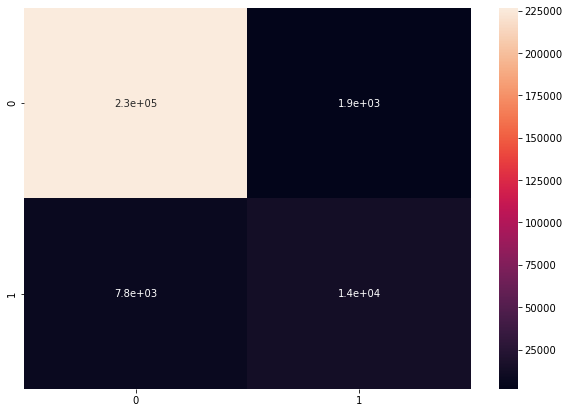

In [3]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
labels  =[0, 1]
df_cfm = pd.DataFrame(cm, index = labels, columns = labels)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
cfm_plot.figure.savefig("cfm.png")
